# **(Car price prediction)**

## Objectives

* Fetch data from Kaggle and save as raw data
* Clean and transform the data
* Load data into a suitable format for analysis
* Ensure data quality and

## Inputs

* Using data from https://www.kaggle.com/datasets/hellbuoy/car-price-prediction 

## Outputs

* The only file I generated through the notebook was cleandata.csv




---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Hackathon1/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Hackathon1'

# Section 1

Extract data from dataset and begin cleaning

In [4]:
# Read csv file and output as pandas df 

import pandas as pd

data = pd.read_csv('CarPrice_Assignment.csv')

data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# Check for missing values 

data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
# Inspect data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Deciding to drop columns that aren't relevant to car price, and removing others that are similar to each other in terms of how they could affect price(example: Wheelbase and carwidth)

In [7]:
enginelocation_amount = data['enginelocation'].value_counts()
enginelocation_amount

front    202
rear       3
Name: enginelocation, dtype: int64

In [8]:
sort_by_price = data.sort_values(by=['price'], ascending=False)
sort_by_price.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
128,129,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028.0
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
72,73,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
127,128,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,34028.0


Decided to keep enginelocation for now as although there are only 3 values, 2 of those values are in the top 10 priced cars

In [9]:
dropped_columns = ['car_ID', 'carwidth', 'carlength', 'carheight',
                   'boreratio', 'stroke', 'compressionratio', 'peakrpm',
                   'symboling', 'doornumber', 'fuelsystem', 'enginetype',
                    'enginesize', 'fuelsystem', 'aspiration']
data = data.drop(columns=dropped_columns, axis=1)
data.head()

,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,curbweight,cylindernumber,horsepower,citympg,highwaympg,price
0,alfa-romero giulia,gas,convertible,rwd,front,88.6,2548,four,111,21,27,13495.0
1,alfa-romero stelvio,gas,convertible,rwd,front,88.6,2548,four,111,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,2823,six,154,19,26,16500.0
3,audi 100 ls,gas,sedan,fwd,front,99.8,2337,four,102,24,30,13950.0
4,audi 100ls,gas,sedan,4wd,front,99.4,2824,five,115,18,22,17450.0


- Removed car_ID as it is irrelevant to price
- Removed car width/length/height as wheelbase and weight are going to be used for the size of the car
- Removed boreratio, stroke, compressionratio and peakrpm as I have enginesize, horsepower and cylindernumber for car performace which I think are better
- Looked up symboling and it is a risk factor rating which would be more correlated with insurance prices, also from the top 10 priced cars above there didn't appear to be relevant to price of the car as half of the cars there have a 0 rating.
- Removed door number as I already have cartype and having less doors could make the car more or less expensive depending on whether it's a sportscar or hatchback, which would be shown in cartype anyway.
- Retroactively dropped fuelsystem, enginetype, enginesize, fuelsystem and aspiration due to some of them having similarities to other variables and also time constraints

In [10]:
# Check for duplicates

data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [11]:
data.describe()

,wheelbase,curbweight,horsepower,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,2555.565854,104.117073,25.219512,30.751220,13276.710571
std,6.021776,520.680204,39.544167,6.542142,6.886443,7988.852332
min,86.600000,1488.000000,48.000000,13.000000,16.000000,5118.000000
25%,94.500000,2145.000000,70.000000,19.000000,25.000000,7788.000000
50%,97.000000,2414.000000,95.000000,24.000000,30.000000,10295.000000
75%,102.400000,2935.000000,116.000000,30.000000,34.000000,16503.000000
max,120.900000,4066.000000,288.000000,49.000000,54.000000,45400.000000


Checking how many unique car names there are, will most likely just remove models and just keep the brand if there are a lot 

In [12]:
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [13]:
data['CarName'] = data['CarName'].str.split().str[0]


data.head()

,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,curbweight,cylindernumber,horsepower,citympg,highwaympg,price
0,alfa-romero,gas,convertible,rwd,front,88.6,2548,four,111,21,27,13495.0
1,alfa-romero,gas,convertible,rwd,front,88.6,2548,four,111,21,27,16500.0
2,alfa-romero,gas,hatchback,rwd,front,94.5,2823,six,154,19,26,16500.0
3,audi,gas,sedan,fwd,front,99.8,2337,four,102,24,30,13950.0
4,audi,gas,sedan,4wd,front,99.4,2824,five,115,18,22,17450.0


Now I have to fix the brands with spelling errors and duplicates and confirm they have been fixed

In [14]:
brand_correction = {
    'alfa-romero': 'alfa-romeo',
    'maxda': 'mazda',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'porcshce': 'porsche',
    'Nissan': 'nissan'
}

data['CarName'] = data['CarName'].replace(brand_correction)
data['CarName'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Now going to check all other variables that have potentially repeated values due to spelling errors

In [15]:
columns = ['fueltype', 'carbody', 'drivewheel',
           'enginelocation', 'cylindernumber']

for col in columns:
    print(f"{col}: {data[col].unique()}")

fueltype: ['gas' 'diesel']
carbody: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel: ['rwd' 'fwd' '4wd']
enginelocation: ['front' 'rear']
cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


changing cylindernumbers from strings to numbers

In [16]:
cylinder_correction = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}

data['cylindernumber'] = data['cylindernumber'].replace(cylinder_correction)
data['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8])

In [17]:
data.head()

,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,curbweight,cylindernumber,horsepower,citympg,highwaympg,price
0,alfa-romeo,gas,convertible,rwd,front,88.6,2548,4,111,21,27,13495.0
1,alfa-romeo,gas,convertible,rwd,front,88.6,2548,4,111,21,27,16500.0
2,alfa-romeo,gas,hatchback,rwd,front,94.5,2823,6,154,19,26,16500.0
3,audi,gas,sedan,fwd,front,99.8,2337,4,102,24,30,13950.0
4,audi,gas,sedan,4wd,front,99.4,2824,5,115,18,22,17450.0


Using OneHotEncoder for all categorical variables

In [18]:
from sklearn.pipeline import Pipeline
from feature_engine.encoding import OneHotEncoder

In [19]:
data['CarName'].value_counts()

toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
volkswagen    12
subaru        12
peugeot       11
volvo         11
dodge          9
buick          8
bmw            8
audi           7
plymouth       7
saab           6
porsche        5
isuzu          4
jaguar         3
chevrolet      3
alfa-romeo     3
renault        2
mercury        1
Name: CarName, dtype: int64

In [20]:
pipeline = Pipeline([
      ('ohe', OneHotEncoder(variables=['fueltype', 'drivewheel', 'enginelocation', 'carbody'], drop_last=True) )
])


data = pipeline.fit_transform(data)
data.head()

,CarName,wheelbase,curbweight,cylindernumber,horsepower,citympg,highwaympg,price,fueltype_gas,drivewheel_rwd,drivewheel_fwd,enginelocation_front,carbody_convertible,carbody_hatchback,carbody_sedan,carbody_wagon
0,alfa-romeo,88.6,2548,4,111,21,27,13495.0,1,1,0,1,1,0,0,0
1,alfa-romeo,88.6,2548,4,111,21,27,16500.0,1,1,0,1,1,0,0,0
2,alfa-romeo,94.5,2823,6,154,19,26,16500.0,1,1,0,1,0,1,0,0
3,audi,99.8,2337,4,102,24,30,13950.0,1,0,1,1,0,0,1,0
4,audi,99.4,2824,5,115,18,22,17450.0,1,0,0,1,0,0,1,0


decided to leave car name as is, too many rare values are luxury cars on and didn't want to add that many columns to the dataset

sending 'cleaned' data to a new csv file

In [21]:
data.to_csv('/workspace/Hackathon1/cleandata.csv', index=False)

In [22]:
cleandata = pd.read_csv('cleandata.csv')
cleandata.head()


,CarName,wheelbase,curbweight,cylindernumber,horsepower,citympg,highwaympg,price,fueltype_gas,drivewheel_rwd,drivewheel_fwd,enginelocation_front,carbody_convertible,carbody_hatchback,carbody_sedan,carbody_wagon
0,alfa-romeo,88.6,2548,4,111,21,27,13495.0,1,1,0,1,1,0,0,0
1,alfa-romeo,88.6,2548,4,111,21,27,16500.0,1,1,0,1,1,0,0,0
2,alfa-romeo,94.5,2823,6,154,19,26,16500.0,1,1,0,1,0,1,0,0
3,audi,99.8,2337,4,102,24,30,13950.0,1,0,1,1,0,0,1,0
4,audi,99.4,2824,5,115,18,22,17450.0,1,0,0,1,0,0,1,0


---

# Section 2

Making basic charts/graphs using Matplotlib and Seaborn and trying to understand the data structure

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
cleandata.describe()

,wheelbase,curbweight,cylindernumber,horsepower,citympg,highwaympg,price,fueltype_gas,drivewheel_rwd,drivewheel_fwd,enginelocation_front,carbody_convertible,carbody_hatchback,carbody_sedan,carbody_wagon
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,2555.565854,4.380488,104.117073,25.219512,30.751220,13276.710571,0.902439,0.370732,0.585366,0.985366,0.029268,0.341463,0.468293,0.121951
std,6.021776,520.680204,1.080854,39.544167,6.542142,6.886443,7988.852332,0.297446,0.484183,0.493865,0.120377,0.168970,0.475361,0.500215,0.328031
min,86.600000,1488.000000,2.000000,48.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.500000,2145.000000,4.000000,70.000000,19.000000,25.000000,7788.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,2414.000000,4.000000,95.000000,24.000000,30.000000,10295.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,102.400000,2935.000000,4.000000,116.000000,30.000000,34.000000,16503.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,120.900000,4066.000000,12.000000,288.000000,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Distribution of car prices

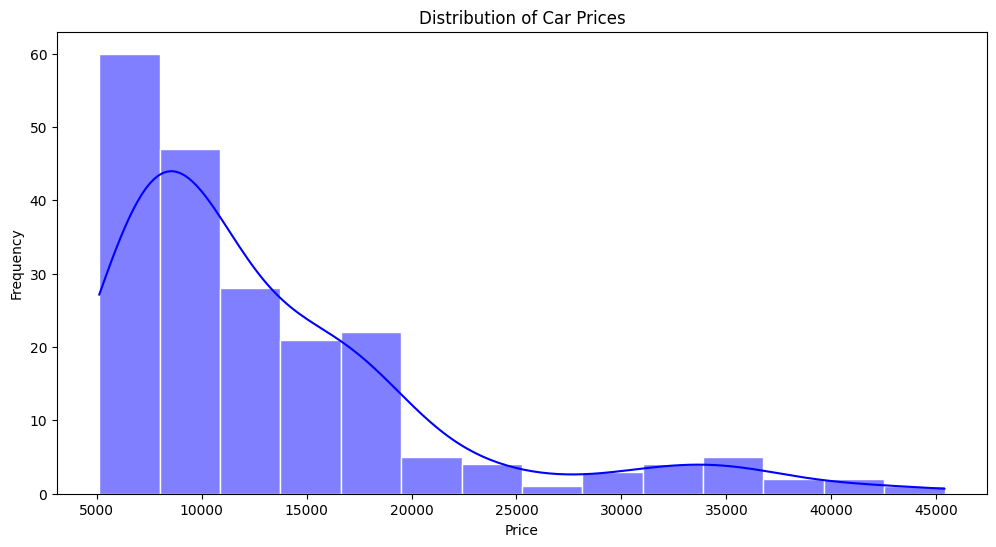

In [25]:
fig, axes = plt.subplots(figsize=(12,6))
sns.set_theme(style ='whitegrid')
sns.histplot(cleandata['price'], kde=True, color='blue')
plt.title("Distribution of Car Prices")
plt.xlabel("Price",)
plt.ylabel("Frequency")
plt.show()

The above graph clearly shows that the majority of cars are purchased on the cheaper end, with a fairly sharp drop off as they get more expensive.

Horspower vs price

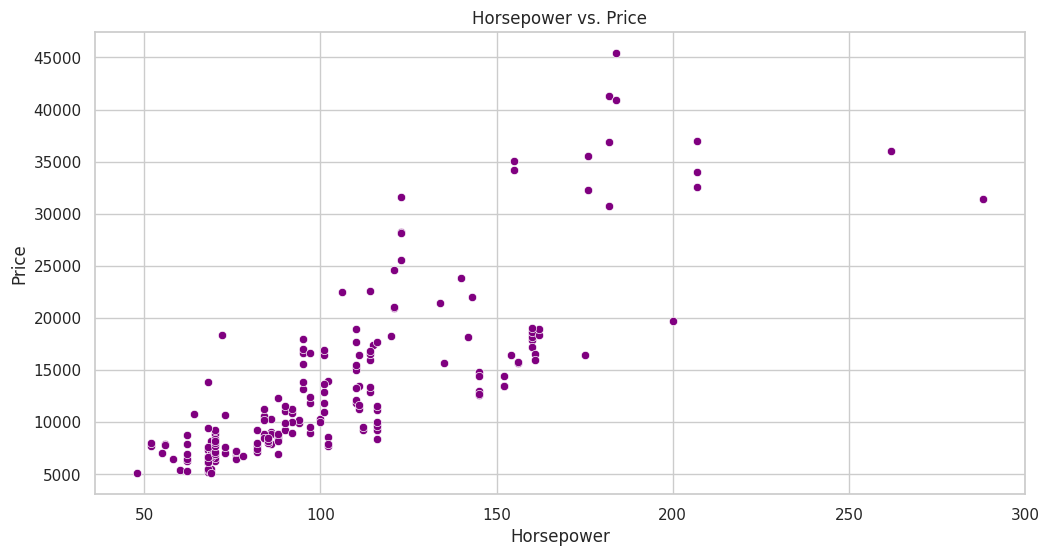

In [26]:
fig, axes = plt.subplots(figsize=(12,6))
sns.scatterplot(x=cleandata['horsepower'], y=cleandata['price'], color="purple")
plt.title("Horsepower vs. Price")
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.show()

Horspower can be shown to be fairly highly correlated with the car price, with all of the most expensive carts having minimum 150 horsepower, and from the described data above we know that 25% of cars have 115 hp or more 

Curbweight vs Price

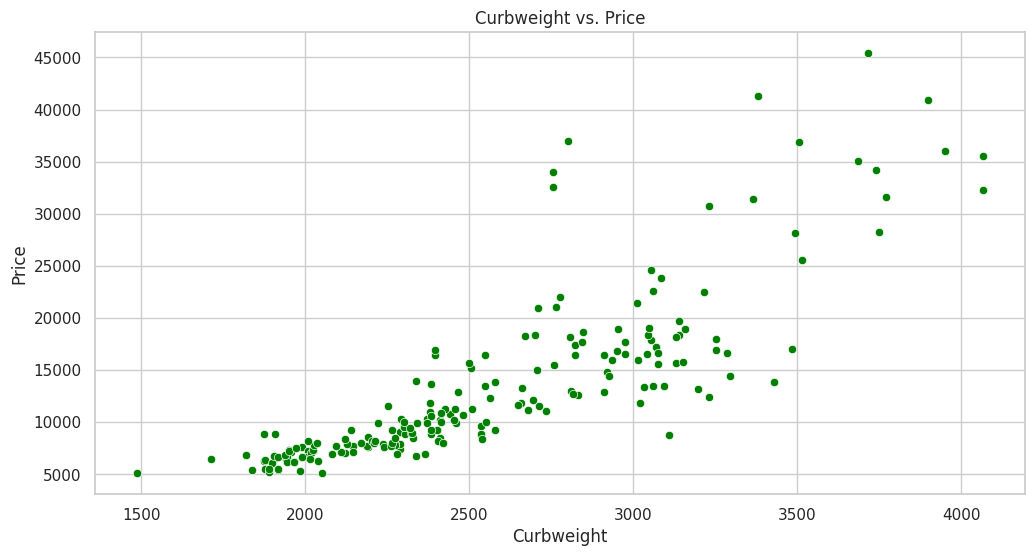

In [27]:
fig, axes = plt.subplots(figsize=(12,6))
sns.scatterplot(x=cleandata['curbweight'], y=cleandata['price'], color="green")
plt.title("Curbweight vs. Price")
plt.xlabel("Curbweight")
plt.ylabel("Price")
plt.show()

Curbweight can also be seen to be highly correleated to price based on the graph above

Correlation heatamp

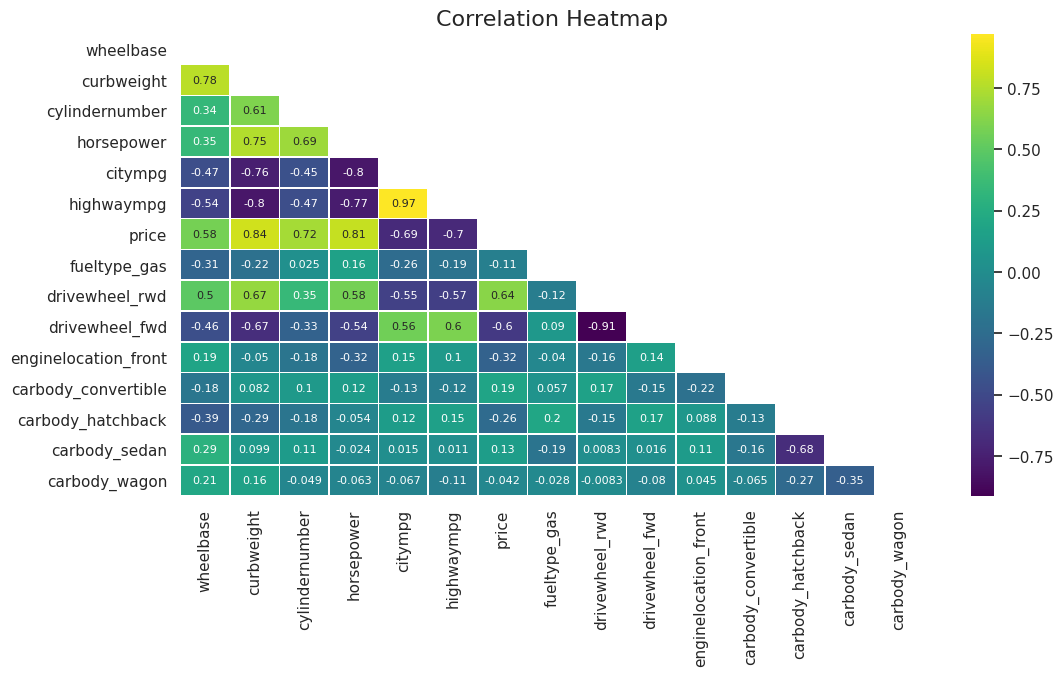

In [28]:
fig, axes = plt.subplots(figsize=(12,6))
data_corr = data.corr()
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data_corr, mask=mask, annot=True, cmap="viridis", linewidths=0.5, annot_kws={"size": 8})
plt.ylim(data_corr.shape[1],0);
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

The heatmap above shows how the size, cylinder number, power and being rwd are all very positively correlated with price. While things like efficiency and being fwd are negatively correlated with the price

**# # Section 3**

In [29]:
import plotly.express as px

Showing the amount of cars purchased at each price point, also seperating based on fueltype

In [48]:
fig = px.histogram(cleandata, x="price", color="fueltype_gas", title='Distribution of Car Prices by Fuel Type')
fig.show()

The graph shows the same story as the histogram before, but also shows that all the most expensive cars are gas powered.

Showing the total sales of each car manufacturer, while also showing the prices of each vehicle sold

In [49]:
fig = px.bar(cleandata, x='CarName', y='price', color='price', title='Car Prices by Manufacturer')
fig.show()

The graph shows what I would expect, brands like toyota and nissan have high total sales with most, if not all, sales being made with low priced cars. Luxury brands such as porsche and buick especially, also have high total sales figures with the majority of their income coming from the sale of highly priced vehicles.

Curbweight vs price scatterplot including citympg

In [52]:
fig = px.scatter(cleandata, x="curbweight", y="price", color='citympg', title='Curbweight and Price ratio Coloured by City MPG')
fig.show()

This shows again that curbweight and price are positively correlated, while the inverse is true for citympg

In [40]:
cleandata.head()

,CarName,wheelbase,curbweight,cylindernumber,horsepower,citympg,highwaympg,price,fueltype_gas,drivewheel_rwd,drivewheel_fwd,enginelocation_front,carbody_convertible,carbody_hatchback,carbody_sedan,carbody_wagon
0,alfa-romeo,88.6,2548,4,111,21,27,13495.0,1,1,0,1,1,0,0,0
1,alfa-romeo,88.6,2548,4,111,21,27,16500.0,1,1,0,1,1,0,0,0
2,alfa-romeo,94.5,2823,6,154,19,26,16500.0,1,1,0,1,0,1,0,0
3,audi,99.8,2337,4,102,24,30,13950.0,1,0,1,1,0,0,1,0
4,audi,99.4,2824,5,115,18,22,17450.0,1,0,0,1,0,0,1,0


In [56]:

fig = px.scatter_matrix(data_frame=cleandata,
                        dimensions=["curbweight", "wheelbase", "highwaympg", "cylindernumber"],
                        color="price",
                        width=1000,
                        height=1000,
                        title="Correlation between multiple variables colour coded by Price"
                        )
fig.show()

The above scatter plot shows that pretty much all the variables above can be shown to be somewhat, if not very, correlated to the price due based on the colors of each datapoint.
Based on the above graphs, I would say the wheelbase is the least correlated with price due to it having at least a few entries in the higher price brackets at both the low end and high end of its values as well as a mix of values around the middle.
Variables such as highwaympg and wheelbase can be seen being highly correlated to the price, with the pattern of colours almost following the legend on the side exactly, although the are correlated in opposite ways.


---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Conclusions and next steps

I would say as a conclusion, my hypothesis was mostly correct in that most of the variables I expected to be highly correlated with price were shown to be in the graphs.
There were a few exceptions, such as the brand of the car which was much more correlated with price than I expected, brands like toyota and volvo do have some higher valued vehicles but pretty much all of their sales came from vehicles that were on the cheaper side. However, as you would expect, brands like porsche had cars that were all on the more expensive side of things.
I also thought that increased mpg would be responsible for a slightly increased price, however I actually showed that the inverse of this was actually true and it was also one of the values that was most correlated with price, albeit negatively. This can be attributed to the sportier cars with more cylinders/horsepower having worse efficiency while also typically being more expensive.
Based on the correlation heatmap, the fueltype and type of car had the least amount of correlation to the price of the car which I found surprising.

If I had more time or managed my time better, I would have liked to include more graphs/charts in my project, and also keep more of the variables in the project that I had dropped due to time constraints mainly rather than them being redundant. 
I also would've liked to expand more on the conclusions I drew from the graphs themselves and use more data analytics techniques to back up what I was saying, either visually on the graph or through a function.